In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Note:加速度的单位是g(重力加速度),角速度单位是角度制

In [44]:
raw_data=pd.read_csv('meta_data/Data1.csv')
label_1=pd.read_csv('meta_data/Label_of_Data1.csv')
raw_data_M=np.array(raw_data)
i_s=(raw_data.iloc[:,-1]==1)    #raw_data中start/end action的连续index
i_g=(raw_data.iloc[:,-2]==1)    #raw_data中过渡动作的连续index
i_a=(label_1.iloc[:,0]>='0')    #手势动作的起点,终点index

action_label=label_1[i_a].iloc[:,1:]
action_label.reset_index()
action_label=np.array(action_label)

non_gesture_label=label_1[-i_a].iloc[:,1:]
non_gesture_label.reset_index()
non_gesture_label=np.array(non_gesture_label)

start_data=raw_data[i_s].iloc[:,:7].reset_index()
transition_data=raw_data[i_g].iloc[:,:7].reset_index()
Time=raw_data_M[:,0]


In [45]:

#   先平滑数据,再计算
#   加大窗口
T=11   #   阈值法的窗口设为125,峰值法设为11
data_p=np.zeros((46003,7))
data_p[:,0]=raw_data_M[:,0]
for k in range(len(raw_data_M[:,0])):
    if k< (T-1)/2 or len(raw_data_M[:,0])-1-k<(T-1)/2:
        data_p[k,1:]=raw_data_M[k,1:7]
    else:
        data_p[k,1:]=np.mean(raw_data_M[int(k-(T-1)/2):int(k+(T-1)/2+1),1:7],0)

E_acc=(data_p[:,1]**2 + data_p[:,2]**2 + data_p[:,3]**2)
E_omega=(data_p[:,4]**2 + data_p[:,5]**2 + data_p[:,6]**2)
#   进行归一化
def normalization(data):
    data=2*(data-data.min())/(data.max()-data.min())-1
    return data
E_acc=normalization(E_acc)
E_omega=normalization(E_omega)



In [46]:

def gesture_figure(k):
    sns.set()
    plt.figure(dpi=100)
    
    plt.subplot(2,1,1)
    plt.plot(data_p[action_label[k,0]:action_label[k,1]+1,0],E_acc[action_label[k,0]:action_label[k,1]+1],color='r')
    plt.xlabel('time(s)')
    plt.ylabel('E_acc')
    plt.title('gesture action')
    plt.show()

    plt.figure(dpi=100)
    plt.subplot(2,1,2)
    plt.plot(data_p[action_label[k,0]:action_label[k,1]+1,0],E_omega[action_label[k,0]:action_label[k,1]+1],color='b')
    plt.xlabel('time(s)')
    plt.ylabel('E_omega')
    plt.title('gesture action')
    plt.show()




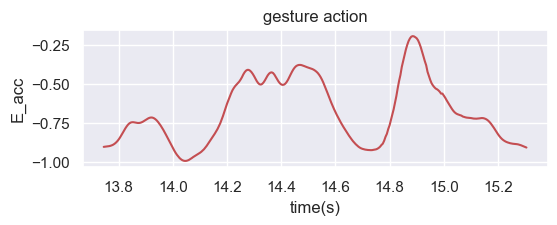

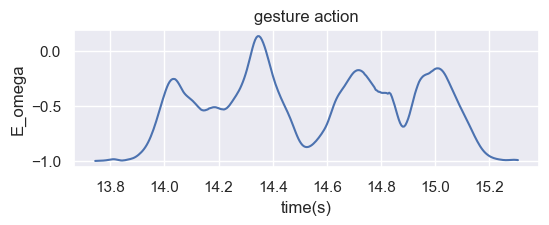

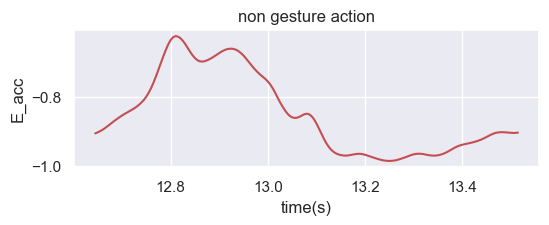

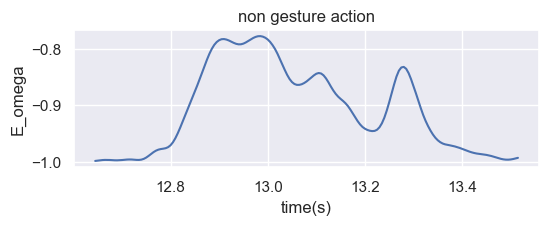

In [47]:
def non_gesture_figure(k):
    sns.set()
    plt.figure(dpi=100)
    
    plt.subplot(2,1,1)
    plt.plot(data_p[non_gesture_label[k,0]:non_gesture_label[k,1]+1,0],E_acc[non_gesture_label[k,0]:non_gesture_label[k,1]+1],color='r')
    plt.xlabel('time(s)')
    plt.ylabel('E_acc')
    plt.title('non gesture action')
    plt.show()

    plt.figure(dpi=100)
    plt.subplot(2,1,2)
    plt.plot(data_p[non_gesture_label[k,0]:non_gesture_label[k,1]+1,0],E_omega[non_gesture_label[k,0]:non_gesture_label[k,1]+1],color='b')
    plt.xlabel('time(s)')
    plt.ylabel('E_omega')
    plt.title('non gesture action')
    plt.show()

gesture_figure(3)
non_gesture_figure(3)

In [48]:
#   寻找峰值
v1=-0.3  #   判断peak的阈值,v1=
v2=-0.5

peak=list()
W=100    #   窗口长度,需要自己调整.暂定为100
for k in range(int(len(E_acc)/W)+1):
    if  k<int(len(E_acc)/W):
        if  E_acc[k*W:(k+1)*W].max()>v2:
            if np.argmax(E_acc[k*W:(k+1)*W])<(k+1)*W:
                peak.append(k*W+np.argmax(E_acc[k*W:(k+1)*W]))
        # elif E_acc[k*W:(k+1)*W].max()>=v2 and E_acc[k*W:(k+1)*W].max()>E_acc[(k-1)*W:(k)*W].max() and E_acc[k*W:(k+1)*W].max()>E_acc[(k+1)*W:(k+2)*W].max():
        #     if np.argmax(E_acc[k*W:(k+1)*W])<(k+1)*W:
        #         peak.append(k*W+np.argmax(E_acc[k*W:(k+1)*W]))
    else:
        pass

peak=np.array(peak)
index=list()
#   对peek进行过滤

for k in range(len(peak)-1):
    if abs(peak[k]-peak[k+1])<200:
        
            index.append(k)
        
peak=np.delete(peak,index)

real_peak=np.zeros((62,))
for k in range(len(action_label)):
    real_peak[k]=E_acc[action_label[k,0]:action_label[k,1]].argmax()+action_label[k,0]

peak_final=pd.Series(peak)
peak_final.to_csv('Output-data/peak(data1).csv')
#   peak的准确度已经很高了,只错了三四个